## Example for Prediction (Part 3)

#### **TO DO**:
- Split dataset in train/test
- Prediction after feature importance

[Interactive Widgets](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/): [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) ; [Using Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

[graphviz](https://graphviz.readthedocs.io/en/stable/manual.html)


Filename:  C:/Users/JTavares/Documents/GitHub/Tese/3/Dados de defeito enviados - processed.csv

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn import metrics
from IPython.display import display, clear_output, Markdown

from google.colab import files
import io

In [3]:
!ls "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv"

'/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv'


### Import CSV

In [4]:
path = "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv"

print("Filename: ", path)

df = pd.read_csv(path)

display(df.head())
print("Shape:", df.shape)

Filename:  /content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/Dados de defeito enviados 1 - processed.csv


,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Quant. Prod.,out_Total c/Defeito
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,10,2020,3,0,98,0
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,10,2020,3,0,200,0
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,62,0
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,92,0
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5


Shape: (1068, 16)


In [5]:
df.rename(columns = {'out_Total c/Defeito': 'out_defects', 'out_Quant. Prod.':'out_Qtd.ordem'}, inplace = True)

df['Qtd.ordem'] = df.loc[:, 'out_Qtd.ordem']

In [6]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

data = df.keys()
dtypes = df.dtypes
features = [out for out in data if "out_" not in out]
output = [out for out in data if "out_" in out]
checkboxes = [widgets.Checkbox(value=True, description=label) for label in features]
out_checkboxes = [widgets.Checkbox(value=True, description=label) for label in output]
out_options = [widgets.Dropdown(options=['sum', 'mean', 'max', 'min'], description='Aggregate options:') for x in output]
out_qt = widgets.ToggleButtons(options=output, description='Detected defects:', style = {'description_width': 'initial'})
butt = widgets.Button(description="OK", icon="check")


lst = [[], [], []] ; out_lst = [[], []]
for i in range(len(checkboxes)):
    lst[i%3].append(checkboxes[i])

# for i in range(len(out_checkboxes)):
#     out_lst[0].append(out_checkboxes[i])
#     out_lst[1].append(out_options[i])


tab1 = widgets.HBox([widgets.VBox(lst[0]), widgets.VBox(lst[1]), widgets.VBox(lst[2])])
tab2 = widgets.HBox([out_qt]) # widgets.VBox(out_lst[0]), widgets.VBox(out_lst[1]), out_qt])

outt = widgets.Output()
selected_features = []
selected_output = []

def on_check_clicked(b):
    with outt:
        clear_output()
        global selected_data
        global selected_output
        selected_data = []
        selected_output = []
        for i in range(0, len(checkboxes)):
            if checkboxes[i].value == True:
                selected_data = selected_data + [checkboxes[i].description]
#         for i in range(0, len(out_checkboxes)):
#             if out_checkboxes[i].value == True:
#                 selected_output[out_checkboxes[i].description] = out_options[i].value
        if output[0] != out_qt.value:
            selected_output = [out_qt.value, output[0]]
        else: 
            selected_output = output
            
        print("Selected data: ", selected_data)
        print("Selected output: ", selected_output)
        
        


tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Features')
tab.set_title(1, 'Output')
widgets.VBox(children=[tab])
        
butt.on_click(on_check_clicked)
display(tab, butt, outt)

Button(description='OK', icon='check', style=ButtonStyle())

Output()

### Create measure ratios

In [9]:
df["percentage"] = df[selected_output[0]]/df[selected_output[1]]*100

# create ratio from percentage
total_percentage = df["percentage"].sum()

df["ratio"] = df["percentage"]/total_percentage * 100

total_ratio = df["ratio"].max()
print("Max value:", total_ratio)
df1 = df[df['percentage'] >= 2]

Max value: 7.528403052322977


In [10]:
df1.head()

,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Qtd.ordem,out_defects,Qtd.ordem,percentage,ratio
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5,152,3.289474,0.397384
5,P1,69,PR,Ber,142,34,3.8,NG,14.0,48.0,10,2020,4,0,69,43,69,62.318841,7.528403
66,P1,282,PR,Ber,62,34,3.8,CL/PL,18.0,55.0,11,2020,4,0,282,15,282,5.319149,0.642578
77,P2,28,CA,Flo,180,70,8.0,NG,20.0,56.0,11,2020,0,0,28,9,28,32.142857,3.883005
122,P2,289,PR,Dub,112,29,4.0,KL,18.0,50.0,11,2020,4,1,289,9,289,3.114187,0.376208


In [12]:
# selected_data = ['Processo_ P', 'Quant. Prod.', 'Caracteristica T', 'Caracteristica L', 'Comp.', 'Larg.', 'Espess.', 'Caracteristica A', 'T (ºC)', '%HR', 'week day', 'months']

df.dropna(subset = ["T (ºC)"], inplace=True)
df.dropna(subset = ["Caracteristica A"], inplace=True)

print(df.isnull().sum())

Processo_ P         0
Quant. Prod.        0
Caracteristica T    0
Caracteristica L    0
Comp.               0
Larg.               0
Espess.             0
Caracteristica A    0
T (ºC)              0
%HR                 0
month               0
year                0
week day            0
months              0
out_Qtd.ordem       0
out_defects         0
Qtd.ordem           0
percentage          0
ratio               0
dtype: int64


In [ ]:
print(df['car1_1'].value_counts())
df = df[df['car1_1'] == 'BD-AE']

BD-AE       12809
BD-CY        3903
LI-LD        2709
BD-TC        1716
LI-BT        1618
BD-RC        1072
LI-TP        1024
BD-TL         959
LI-RG         324
LI-BT/LD      115
LI-LD/BT       15
LI-CI           3
Name: car1_1, dtype: int64


### Prepare targets (for classification)

Prepare Categorical Output by defining n categories for the target.


- [ ] 6 Sigma --> how many categories?
0. 0% (no defects)
1. defects > 69%
2. defects: 69%-31%
3. defects: 31%-6,7%
4. defects: 6,7%-0.62%
5. defects: 0.62%-0.023%
6. defects: 0.023%-0%

- [ ] 2-4 categories

In [13]:
w_bins = widgets.RadioButtons(
    options=['2 levels', '3 levels', '6 Sigma levels'],
    description='Bins:',
    disabled=False
)

w_bins

RadioButtons(description='Bins:', options=('2 levels', '3 levels', '6 Sigma levels'), value='2 levels')

In [16]:
y_mean = df['percentage'].mean()
y_max = df['percentage'].max()
print("Percentage mean: ", y_mean)
print("Percentage max: ", y_max)

bins_6s = [-0.0001, 0, 0.023, 0.62, 6.7, 31, 69, 100]; bins_2 = [-1, 0, y_max] ; bins_3 = [-1, 0, y_mean, y_max]
labels_6s = [0, 1, 2, 3, 4, 5, 6] ; labels_2 = [0, 1] ; labels_3 = [0, 1, 2]

if w_bins.value == "2 levels":
    bins = bins_2 ; labels = labels_2
elif w_bins.value == "3 levels":
    bins = bins_3 ; labels = labels_3
elif w_bins.value == "6 Sigma levels":
    bins = bins_6s ; labels = labels_6s
else:
    print("Choose bins levels")

print("Bins:", w_bins.value)

df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)

if df["binned"].isnull().sum() > 0:
    df.dropna(subset = ["binned"], inplace=True)

display(df.head())
print(df.shape)

Percentage mean:  0.778723423534922
Percentage max:  62.31884057971014
Bins: 2 levels


,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Qtd.ordem,out_defects,Qtd.ordem,percentage,ratio,binned
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,10,2020,3,0,98,0,98,0.000000,0.000000,0
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,10,2020,3,0,200,0,200,0.000000,0.000000,0
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,62,0,62,0.000000,0.000000,0
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,92,0,92,0.000000,0.000000,0
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5,152,3.289474,0.397384,1


(1063, 20)


#### Convert Imbalanced Dataset into Balanced Dataset
if needed

[link](https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5)

In [17]:
df_count =df["binned"].value_counts()

display(df_count)

0    926
1    137
Name: binned, dtype: int64

In [18]:
# load dataset
data = df

selected_data = ['Processo_ P', 'Comp.', 'Larg.', 'Espess.', 'T (ºC)', 
                 '%HR', 'week day', 'months', 'Qtd.ordem'] #'month', 'year', 'Caracteristica T', 'Caracteristica L', 'Caracteristica A',

# feature matrix
X = data[selected_data]

# target vector
y = df['binned']

display(X.head())
print("X (shape):", X.shape, "; Y (shape):", y.shape)

,Processo_ P,Comp.,Larg.,Espess.,T (ºC),%HR,week day,months,Qtd.ordem
0,P2,140,38,5.0,25.0,31.0,3,0,98
1,P2,38,38,5.0,25.0,31.0,3,0,200
2,P2,70,30,5.0,25.0,31.0,3,0,62
3,P2,70,30,5.0,25.0,31.0,3,0,92
4,P1,224,34,3.0,14.0,48.0,4,0,152


X (shape): (1063, 9) ; Y (shape): (1063,)


### Encode Categorical Data (inputs)

We need to encode our categorical data to numbers. There are 3 techniques to encode data: 
1. **Integer Encoding**
2. **One Hot Encoding**
3. **Learned Embedding**

[Categorical data for deep learning](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

First, *One Hot Enconding* was tested. For this task, the numeric and categorical features were defined.

*comment: with this task, the number of features was reduced from 416 to 212*

In [19]:
w_tt = widgets.RadioButtons(
    options=['Random', 'Ordered'],
    description='Train/Test Split:',
    disabled=False,
    style = {'description_width': 'initial'}
)

w_size = widgets.IntSlider(
    value=80,
    min=0,
    max=100,
    step=1,
    description='(%) Training set size:',
    disabled=False,
#     continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(widgets.HBox([w_tt, w_size]))

In [51]:
from sklearn.model_selection import train_test_split

def prepare_inputs(X_train):
    X_train = pd.get_dummies(X_train)
    return X_train

# prepare input data
X_enc = prepare_inputs(X)
y_class = df['binned']
X_enc.drop(['Processo_ P_P2'], axis=1, inplace=True)

test_size = 1 - (w_size.value/100)

if w_tt.value == "Random":
    shuffle = True
else: shuffle = False

print("Shuffle:", shuffle, "; Test size:", test_size)
    
# shuffle is used to randomly mix the dataset
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_class, test_size=test_size, shuffle=shuffle)


print("\nX (shape):", X_train.shape, X_test.shape)
print("y (shape):", y_train.shape, y_test.shape)

display(X_train.head())

Shuffle: True ; Test size: 0.19999999999999996

X (shape): (850, 9) (213, 9)
y (shape): (850,) (213,)


,Comp.,Larg.,Espess.,T (ºC),%HR,week day,months,Qtd.ordem,Processo_ P_P1
206,112,29,4.0,15.0,52.0,5,1,633,0
677,245,45,8.0,22.0,39.0,1,5,76,0
907,35,34,3.8,19.0,45.0,1,7,1536,1
1000,112,29,4.0,24.0,43.0,5,12,432,0
995,190,34,3.8,25.0,39.0,0,10,276,1


### Select score to be evaluated

F1 score was selected as evaluation criterion

--> criar widget para selecionar critério: F1, F2, F0.5, Accuracy, Balanced_accuracy

In [52]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')

scoring = widgets.Dropdown(
    options=['balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'roc_auc', 'average_precision'],
    description='Scoring:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_cv = widgets.IntSlider(
    value=5, min=2, max=10, step=1,
    description='K-Folds (CV):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Cross Validation (CV)"))
display(dt_cv)
display(Markdown("### Evaluation criteria"))
display(scoring)

### Cross Validation (CV)

IntSlider(value=5, continuous_update=False, description='K-Folds (CV):', max=10, min=2, style=SliderStyle(desc…

### Evaluation criteria

Dropdown(description='Scoring:', options=('balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'r…

### Select parameters

In [53]:
dt_criterion = widgets.Dropdown(
    options=['gini', 'entropy'],
    description='Criterion:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_depth = widgets.Dropdown(
    options=[3, 4, 6, 8, 10, 15, None],
    value=10,
    description='Max Depth:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_weighted = widgets.Checkbox(
    value=False,
    description='class_weighted',
    disabled=False,
    indent=False,
    style = {'description_width': 'initial'}
)

dt_min_split = widgets.IntSlider(
    value=2,
    min=2,
    max=10,
    step=1,
    description='Min samples split:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

dt_min_leaf = widgets.IntSlider(
    value=1,
    min=1,
    max=10,
    step=1,
    description='Min samples leaf:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Parameters for Decision Tree"))
display(widgets.VBox([widgets.HBox([dt_criterion, dt_depth]),
                      widgets.HBox([dt_min_leaf, dt_min_split]),
                      widgets.HBox([dt_weighted])]))

### Parameters for Decision Tree

In [54]:
# dt_criterion, dt_depth, dt_min_leaf, dt_min_split, dt_bootstrap, dt_weighted

criterion = str(dt_criterion.value)
max_depth = dt_depth.value
min_samples_split = int(dt_min_split.value)
min_samples_leaf = int(dt_min_leaf.value)
if dt_weighted.value == True: class_weight = 'balanced'
else: class_weight = None

{'criterion': criterion,
'max_depth': max_depth,
'class_weight': class_weight,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

{'criterion': 'gini',
 'max_depth': 10,
 'class_weight': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

## Recursive Feature Elimination (RFE)

Evaluation criteria:  balanced_accuracy
>8 0.599 (0.025)
>10 0.611 (0.009)
>12 0.602 (0.027)
>14 0.597 (0.014)
>16 0.588 (0.010)
>18 0.626 (0.019)


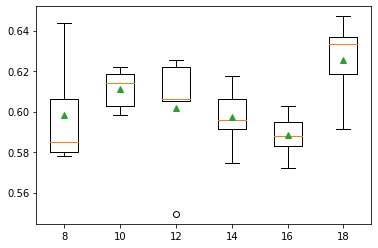

In [55]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# decision tree for feature importance on a classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(8,20,2):
		rfe = RFE(estimator=DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, class_weight=class_weight,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

i = 10;

# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	# lr
# 	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# perceptron
# 	rfe = RFE(estimator=Perceptron(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# cart
# 	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# rf
# 	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# gbm
# 	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	return models


# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring=scoring.value, cv=dt_cv.value, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
print("Evaluation criteria: ", scoring.value)
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [56]:
rfe = RFE(estimator=DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, class_weight=class_weight,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf), n_features_to_select=16)

# train the model
rfe.fit(X_train,y_train)

ind = []
for c,s in zip(X_enc.columns, rfe.support_):
  if s:
      ind.append(c)

print("Features: ", ind)

Features:  ['Comp.', 'Larg.', 'Espess.', 'T (ºC)', '%HR', 'week day', 'months', 'Qtd.ordem', 'Processo_ P_P1']


### Feature selection (without standardization)

In [57]:
# feature matrix
feature_selected = ind
X_train_fsel = X_train[feature_selected]
X_test_fsel = X_test[feature_selected]

print("\nFeature Selection --> X_train (shape):", X_train_fsel.shape, "; X_train (shape):", X_test_fsel.shape)
display(X_train_fsel.head())


Feature Selection --> X_train (shape): (850, 9) ; X_train (shape): (213, 9)


,Comp.,Larg.,Espess.,T (ºC),%HR,week day,months,Qtd.ordem,Processo_ P_P1
206,112,29,4.0,15.0,52.0,5,1,633,0
677,245,45,8.0,22.0,39.0,1,5,76,0
907,35,34,3.8,19.0,45.0,1,7,1536,1
1000,112,29,4.0,24.0,43.0,5,12,432,0
995,190,34,3.8,25.0,39.0,0,10,276,1


### Preprocessing data
[preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

Standardization, or mean removal and variance scaling

In [58]:
from sklearn import preprocessing

# feature matrix
feature_selected = ind
X_enc_fsel = X_enc[feature_selected]

scaler = preprocessing.StandardScaler().fit(X_enc_fsel)
X_scaled = pd.DataFrame(scaler.transform(X_enc_fsel))

# display(X_scaled)

# shuffle is used to randomly mix the dataset
X_train_fsel, X_test_fsel, y_train, y_test = train_test_split(X_scaled, y_class, test_size=test_size, shuffle=shuffle)

print("Shuffle:", shuffle, "; Test size:", test_size)
print("\nFeature Selection --> X_train (shape):", X_train_fsel.shape, "; X_train (shape):", X_test_fsel.shape)
display(X_train_fsel.head())

Shuffle: True ; Test size: 0.19999999999999996

Feature Selection --> X_train (shape): (850, 9) ; X_train (shape): (213, 9)


,0,1,2,3,4,5,6,7,8
181,-0.640743,-0.471554,-0.828503,-0.373478,0.110525,-0.285824,-1.096346,-0.456069,1.500255
580,0.826818,-0.471554,-0.428117,1.057030,-1.628003,-0.285824,0.256037,0.308204,1.500255
515,0.110935,-0.416561,-0.828503,0.035239,0.293528,0.317015,-0.082059,0.113314,-0.666553
275,-0.604948,-0.471554,-0.328021,-1.395268,-0.255481,0.317015,-0.758250,-0.746493,1.500255
478,2.151203,-0.471554,-0.828503,0.239597,-0.163980,-0.285824,-0.082059,-0.555425,1.500255


## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegression(class_weight='balanced')
logregCV = LogisticRegressionCV(class_weight='balanced', scoring=scoring.value, cv=dt_cv.value)


# fit model
logreg.fit(X_train_fsel, y_train)
logregCV.fit(X_train_fsel, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5, scoring='balanced_accuracy')

### Prediction

Source: https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/ ; https://rasbt.github.io/mlxtend/

In [60]:
for model in [logreg, logregCV]:
    # make a prediction
    y_pred = model.predict(X_test_fsel)

    print("Model:", model)
    print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
    print("\n", metrics.classification_report(y_test, y_pred))

    # Creating the confusion matrix (binary classification)
    cm = metrics.confusion_matrix(y_test, y_pred)
    # Assigning columns names
    cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

    display(cm_df)
    
    print("Selected features: ", feature_selected)
    # print("Feature importance: ", model.)
    
    print("\n\n")

Model: LogisticRegression(class_weight='balanced')
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19


Selected features:  ['Comp.', 'Larg.', 'Espess.', 'T (ºC)', '%HR', 'week day', 'months', 'Qtd.ordem', 'Processo_ P_P1']



Model: LogisticRegressionCV(class_weight='balanced', cv=5, scoring='balanced_accuracy')
Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.95      0.78      0.86       186
           1       0.32      0.70      0.44        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.65       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,145,41
Actual Positive,8,19


Selected features:  ['Comp.', 'Larg.', 'Espess.', 'T (ºC)', '%HR', 'week day', 'months', 'Qtd.ordem', 'Processo_ P_P1']





### Logistic Regression (Grid Search)

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'class_weight' : ['balanced']}

print("parameters: ", parameters)
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(LogisticRegression(), parameters, scoring=scoring.value, verbose = 2, cv=dt_cv.value, n_jobs=-1)

clf.fit(X_train_fsel, y_train)

#converting the clf.cv_results to dataframe
df_results=pd.DataFrame.from_dict(clf.cv_results_)

parameters:  {'penalty': ['l1', 'l2'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['liblinear'], 'class_weight': ['balanced']}
Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [62]:
df_results = df_results[['params', 'rank_test_score']]
df_results = df_results[df_results['rank_test_score'] <= 10]
display(df_results)

for par in df_results['params']:
  print("Parameters:", par)
  model = LogisticRegression(penalty=par['penalty'], C=par['C'], solver=par['solver'], class_weight=par['class_weight'])
  # model = LogisticRegression()
  model.fit(X_train_fsel, y_train)
  
  # make a prediction
  y_pred = model.predict(X_test_fsel)

  # print("Model:", model)
  print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
  print("\n", metrics.classification_report(y_test, y_pred))

  # Creating the confusion matrix (binary classification)
  cm = metrics.confusion_matrix(y_test, y_pred)
  # Assigning columns names
  cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  display(cm_df)
  print("\n\n")

,params,rank_test_score
10,"{'C': 0.012742749857031334, 'class_weight': 'b...",1
12,"{'C': 0.03359818286283781, 'class_weight': 'ba...",2
14,"{'C': 0.08858667904100823, 'class_weight': 'ba...",2
15,"{'C': 0.08858667904100823, 'class_weight': 'ba...",7
16,"{'C': 0.23357214690901212, 'class_weight': 'ba...",4
17,"{'C': 0.23357214690901212, 'class_weight': 'ba...",7
18,"{'C': 0.615848211066026, 'class_weight': 'bala...",5
19,"{'C': 0.615848211066026, 'class_weight': 'bala...",7
20,"{'C': 1.623776739188721, 'class_weight': 'bala...",5
21,"{'C': 1.623776739188721, 'class_weight': 'bala...",7


Parameters: {'C': 0.012742749857031334, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.95      0.78      0.86       186
           1       0.32      0.70      0.44        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.65       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,145,41
Actual Positive,8,19





Parameters: {'C': 0.03359818286283781, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.95      0.78      0.86       186
           1       0.32      0.70      0.44        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.65       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,145,41
Actual Positive,8,19





Parameters: {'C': 0.08858667904100823, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.95      0.78      0.86       186
           1       0.32      0.70      0.44        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.65       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,145,41
Actual Positive,8,19





Parameters: {'C': 0.08858667904100823, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.95      0.78      0.86       186
           1       0.32      0.70      0.44        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.65       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,145,41
Actual Positive,8,19





Parameters: {'C': 0.23357214690901212, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7699530516431925

               precision    recall  f1-score   support

           0       0.95      0.78      0.86       186
           1       0.32      0.70      0.44        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.65       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,145,41
Actual Positive,8,19





Parameters: {'C': 0.23357214690901212, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 0.615848211066026, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 0.615848211066026, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 1.623776739188721, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 1.623776739188721, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 4.281332398719396, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 4.281332398719396, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 11.288378916846883, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 11.288378916846883, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 29.763514416313132, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 29.763514416313132, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 78.47599703514607, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 78.47599703514607, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 206.913808111479, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 206.913808111479, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 545.5594781168514, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 545.5594781168514, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 1438.44988828766, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 1438.44988828766, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 3792.690190732246, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 3792.690190732246, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 10000.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19





Parameters: {'C': 10000.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.7652582159624414

               precision    recall  f1-score   support

           0       0.95      0.77      0.85       186
           1       0.31      0.70      0.43        27

    accuracy                           0.77       213
   macro avg       0.63      0.74      0.64       213
weighted avg       0.87      0.77      0.80       213



,Predicted Negative,Predicted Positive
Actual Negative,144,42
Actual Positive,8,19


### Logistic Regression CV

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2'],
    'Cs' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'class_weight' : ['balanced']}

print("parameters: ", parameters)
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(LogisticRegressionCV(), parameters, scoring=scoring.value, verbose = 2, cv=5, n_jobs=-1)

clf.fit(X_train_fsel, y_train)

#converting the clf.cv_results to dataframe
df_results=pd.DataFrame.from_dict(clf.cv_results_)

parameters:  {'penalty': ['l1', 'l2'], 'Cs': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['liblinear'], 'class_weight': ['balanced']}
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 2154, in fit
    fold_coefs_ = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib

TypeError: ignored

In [34]:
df_results = df_results[['params', 'rank_test_score']]
df_results = df_results[df_results['rank_test_score'] <= 10]
display(df_results)

for par in df_results['params']:
  print("Parameters:", par)
  model = LogisticRegression(penalty=par['penalty'], C=par['C'], solver=par['solver'], class_weight=par['class_weight'])
  # model = LogisticRegression()
  model.fit(X_train, y_train)
  
  # make a prediction
  y_pred = model.predict(X_test)

  # print("Model:", model)
  print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
  print("\n", metrics.classification_report(y_test, y_pred))

  # Creating the confusion matrix (binary classification)
  cm = metrics.confusion_matrix(y_test, y_pred)
  # Assigning columns names
  cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  display(cm_df)
  print("\n\n")

,params,rank_test_score
10,"{'C': 0.012742749857031334, 'class_weight': 'b...",1
12,"{'C': 0.03359818286283781, 'class_weight': 'ba...",2
14,"{'C': 0.08858667904100823, 'class_weight': 'ba...",3
19,"{'C': 0.615848211066026, 'class_weight': 'bala...",4
21,"{'C': 1.623776739188721, 'class_weight': 'bala...",4
22,"{'C': 4.281332398719396, 'class_weight': 'bala...",4
23,"{'C': 4.281332398719396, 'class_weight': 'bala...",4
24,"{'C': 11.288378916846883, 'class_weight': 'bal...",4
25,"{'C': 11.288378916846883, 'class_weight': 'bal...",4
26,"{'C': 29.763514416313132, 'class_weight': 'bal...",4


Parameters: {'C': 0.012742749857031334, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.91      0.56      0.69       189
           1       0.14      0.54      0.22        24

    accuracy                           0.56       213
   macro avg       0.52      0.55      0.45       213
weighted avg       0.82      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,106,83
Actual Positive,11,13





Parameters: {'C': 0.03359818286283781, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5774647887323944

               precision    recall  f1-score   support

           0       0.91      0.58      0.71       189
           1       0.14      0.54      0.22        24

    accuracy                           0.58       213
   macro avg       0.53      0.56      0.47       213
weighted avg       0.82      0.58      0.65       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,11,13





Parameters: {'C': 0.08858667904100823, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5305164319248826

               precision    recall  f1-score   support

           0       0.87      0.55      0.68       189
           1       0.10      0.38      0.15        24

    accuracy                           0.53       213
   macro avg       0.48      0.46      0.41       213
weighted avg       0.79      0.53      0.62       213



,Predicted Negative,Predicted Positive
Actual Negative,104,85
Actual Positive,15,9





Parameters: {'C': 0.615848211066026, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5492957746478874

               precision    recall  f1-score   support

           0       0.87      0.58      0.69       189
           1       0.09      0.33      0.14        24

    accuracy                           0.55       213
   macro avg       0.48      0.46      0.42       213
weighted avg       0.78      0.55      0.63       213



,Predicted Negative,Predicted Positive
Actual Negative,109,80
Actual Positive,16,8





Parameters: {'C': 1.623776739188721, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5539906103286385

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.55       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.55      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,109,80
Actual Positive,15,9





Parameters: {'C': 4.281332398719396, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 4.281332398719396, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 11.288378916846883, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 11.288378916846883, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 29.763514416313132, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 29.763514416313132, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 78.47599703514607, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 78.47599703514607, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 206.913808111479, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 206.913808111479, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 545.5594781168514, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 545.5594781168514, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 1438.44988828766, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 1438.44988828766, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 3792.690190732246, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 3792.690190732246, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 10000.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9





Parameters: {'C': 10000.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score: 0.5586854460093896

               precision    recall  f1-score   support

           0       0.88      0.58      0.70       189
           1       0.10      0.38      0.16        24

    accuracy                           0.56       213
   macro avg       0.49      0.48      0.43       213
weighted avg       0.79      0.56      0.64       213



,Predicted Negative,Predicted Positive
Actual Negative,110,79
Actual Positive,15,9


### Random Search Cross Validation

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbc = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, n_iter = 100, 
                               cv = dt_cv.value, verbose=2, random_state=42, n_jobs = -1, scoring=scoring.value)
# Fit the random search model\
gbc_random.fit(X_train, y_train)

NameError: ignored

In [36]:
gbc_random.best_params_

NameError: ignored

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Model Performance')
    print('Scoring:', scoring.value)
    print('K-Folds (CV):', dt_cv.value)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("\n", metrics.classification_report(y_test, y_pred))
    
    return accuracy

base_model = model
base_accuracy = evaluate(base_model, X_test, y_test)

print("-"*60)

best_random = gbc_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

### Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Number of features to consider at every split
max_features = [None, 'auto']
# Criterion 
criterion = ['gini', 'entropy']
# Weight
class_weight = [None, 'balanced']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10, 15, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the parameter grid based on the results of random search 
param_grid = {'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'class_weight': class_weight,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

# Create a based model
gbc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, 
                          cv = gbc_cv.value, n_jobs = -1, verbose = 2, scoring=scoring.value)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

base_model = model
base_accuracy = evaluate(base_model, X_test, y_test)

print("-"*60)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    2.4s


Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.82%.

               precision    recall  f1-score   support

           0       0.98      0.82      0.90       244
           1       0.30      0.82      0.43        22

    accuracy                           0.82       266
   macro avg       0.64      0.82      0.66       266
weighted avg       0.92      0.82      0.86       266

------------------------------------------------------------
Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.83%.

               precision    recall  f1-score   support

           0       0.98      0.84      0.90       244
           1       0.30      0.77      0.44        22

    accuracy                           0.83       266
   macro avg       0.64      0.81      0.67       266
weighted avg       0.92      0.83      0.86       266

Improvement of 1.37%.


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    6.8s finished



### Print results and specifications

Write results in file: *results.txt*

In [ ]:
for writing_model in [base_model, best_grid, best_random]:

  # make a prediction
  y_pred = writing_model.predict(X_test)

  accuracy_score = metrics.accuracy_score(y_test, y_pred)
  evaluation = metrics.classification_report(y_test, y_pred)
  
  # # Creating the confusion matrix (binary classification)
  # cm = metrics.confusion_matrix(y_test, y_pred)
  # # Assigning columns names
  # cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  # Creating the confusion matrix (multi-class classification)
  from mlxtend.evaluate import confusion_matrix
  cml2 = confusion_matrix(y_target=y_test, y_predicted=y_pred, binary=True, positive_label=0)

  # Assigning columns names
  cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

  with open('results.txt', 'a') as f:
      f.write('-'*50)
      f.write("\n\nModel: %s" % writing_model)
      f.write("\n\nRandom: %s; Test size: %d" % (shuffle, test_size))
      f.write("\nMax score: %d ; (Feature: %s)" % (max_v*100,imax))

      f.write("\n\nAccuracy score: %d" % accuracy_score)
      f.write("\nScoring criteria optimized: %s" % scoring.value)
      f.write("\nK-Folds (CV): %s" % dt_cv.value)
      f.write("\n%s" % str(evaluation))
      f.write("\n\nConfusion matrix ")
      # save confusion matrix and slice into four pieces
      # TP = cm[1][1]; TN = cm[0][0] ; FP = cm[0][1] ; FN = cm[1][0]
      TP = cml2[0][0] ; TN = cml2[1][1] ; FP = cml2[1][0] ; FN = cml2[0][1]

      f.write('\nTrue Positives: %d' % TP)
      f.write('\nTrue Negatives: %d' % TN)
      f.write('\nFalse Positives: %d' % FP)
      f.write('\nFalse Negatives: %d\n\n' % FN)
      
  display(Markdown('#### Results'))

  print("Model:", writing_model)
  print("Shuffle:", shuffle, "; Test size:", test_size)
  print("Max score:", max_v*100, "(Feature:", imax, ")")

  print("\nAccuracy score:", accuracy_score)
  print('Scoring criteria optimized: ', scoring.value)
  print('K-Folds (CV):', dt_cv.value)
  print("\n", evaluation)

#### Results

Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Shuffle: True ; Test size: 0.25
Max score: 33.414545718409684 (Feature: Quant. Prod. )

Accuracy score: 0.706766917293233
Scoring criteria optimized:  f1_weighted
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.90      0.80      0.84       225
           2       0.00      0.00      0.00         6
           3       0.22      0.27      0.24        30
           4       0.00      0.00      0.00         2
           5       0.25      0.33      0.29         3

    accuracy                           0.71       266

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Results

Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Shuffle: True ; Test size: 0.25
Max score: 33.414545718409684 (Feature: Quant. Prod. )

Accuracy score: 0.8383458646616542
Scoring criteria optimized:  f1_weighted
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.86      0.99      0.92       225
           2       0.00      0.00      0.00         6
           3       0.14      0.03      0.05        30
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3

    accuracy                           0.84       266
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Results

Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Shuffle: True ; Test size: 0.25
Max score: 33.414545718409684 (Feature: Quant. Prod. )

Accuracy score: 0.793233082706767
Scoring criteria optimized:  f1_weighted
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.85      0.93      0.89       225
           2       0.00      0.00      0.00         6
           3       0.11      0.07      0.08        30
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3

    accuracy                           0.79       266


#### Binary Classification

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics

# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Assigning columns names
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,194,41
Actual Positive,13,18


In [ ]:
# save confusion matrix and slice into four pieces
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity (recall)
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 18
True Negatives: 194
False Positives: 41
False Negatives: 13
-------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.58
Specificity: 0.83
Precision: 0.31
f_1 Score: 0.4


#### Multi-class Classification

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

cml = metrics.confusion_matrix(y_test, y_pred, labels=labels_6s)

# Assigning columns names
cml_df = pd.DataFrame(cml)

# Showing the confusion matrix
# cm_df
display(cml_df)

,0,1,2,3,4,5,6
0,198,0,4,25,0,2,0
1,0,0,0,0,0,0,0
2,2,0,0,3,0,0,0
3,11,0,4,5,0,2,0
4,4,0,0,4,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


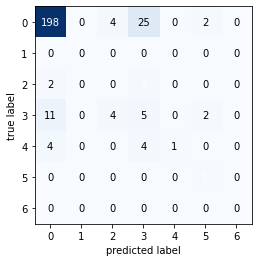

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cml)

# save the figure
plt.savefig(str('plot-'+ model_name + '-cm-1- ' + w_bins.value + '.png'))

plt.show()

In [ ]:
from mlxtend.evaluate import confusion_matrix
cml2 = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=True, 
                      positive_label=0)

# Assigning columns names
cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

# Showing the confusion matrix
cml2_df

# fig, ax = plot_confusion_matrix(conf_mat=cml2)

# # save the figure
# plt.savefig(str('plot-CART-cm-2-' + 'bins-6s' + '.png'))

# plt.show()

,Predicted Positive,Predicted Negative
Actual Positive,20,17
Actual Negative,31,198


In [ ]:
# save confusion matrix and slice into four pieces
TP = cml2[0][0]
TN = cml2[1][1]
FP = cml2[1][0]
FN = cml2[0][1]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 8
True Negatives: 209
False Positives: 27
False Negatives: 22
-------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.27
Specificity: 0.89
Precision: 0.23
f_1 Score: 0.25


## Classification and Regression Trees (CART)

[CART explanation](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/)

The next examples are calculated using this [Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/) methods.

### CART Classification Feature Importance
**Decision tree** for feature importance on a classification problem

Feature: Quant. Prod., Score: 18.47686
Feature: Comp., Score: 8.93835
Feature: Espess., Score: 3.33208
Feature: T (ºC), Score: 5.04452
Feature: Processo_ P_P1, Score: 51.96389
Feature: Caracteristica L_Flo, Score: 3.67350
Feature: Caracteristica A_CONC, Score: 8.57080

Max score: 51.96389144235199 (Feature: Processo_ P_P1 )

Filename:  plot-CART- 2 levels.png


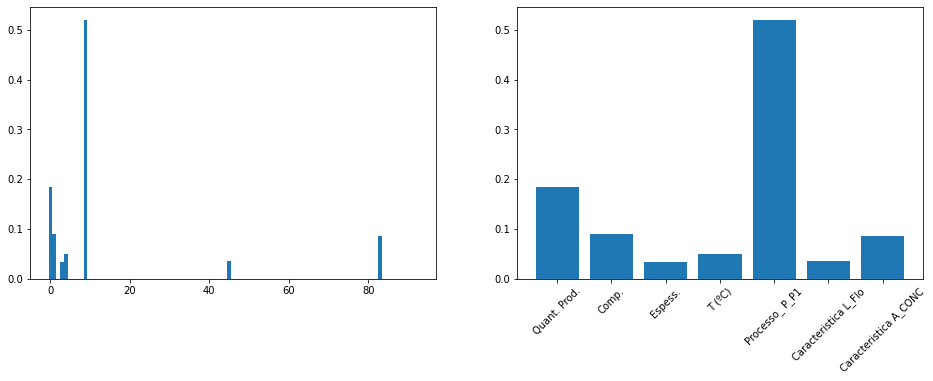

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier

# define the model
model_name = "CART"
model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, class_weight=class_weight,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_enc.columns, importance):
    if abs(v) > 0.2 * 10**(-1):
        ind.append(c) ; res.append(v)
        if v > max_v: max_v = v ; imax = c  
        print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = plt.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
plt.xticks(rotation=45)

print("\nMax score:", max_v*100, "(Feature:", imax, ")")

# save the figure
filename = str('plot-'+ model_name + '- ' + w_bins.value + '.png')
plt.savefig(filename)
print("\nFilename: ", filename)

plt.show()

### Feature Importance

In [ ]:
# Fazer Feature Importance para modelos com melhores resultados

## Feature Selection 

In [ ]:
# load dataset
data = df

# feature matrix
feature_selected = ind
X_train_fsel = X_train[feature_selected]
X_test_fsel = X_test[feature_selected]

print("\nFeature Selection --> X_train (shape):", X_train_fsel.shape, "; X_train (shape):", X_test_fsel.shape)
display(X_train_fsel.head())


Feature Selection --> X_train (shape): (797, 7) ; X_train (shape): (266, 7)


,Quant. Prod.,Comp.,Espess.,T (ºC),Processo_ P_P1,Caracteristica L_Flo,Caracteristica A_CONC
126,336,30,4.0,19.0,0,0,0
862,50,187,3.0,19.0,1,0,0
491,50,180,5.5,18.0,0,0,0
260,302,120,4.0,9.0,0,0,0
746,104,29,3.0,23.0,0,0,1


Feature: Quant. Prod., Score: 18.47686
Feature: Comp., Score: 8.93835
Feature: Espess., Score: 3.33208
Feature: T (ºC), Score: 5.04452
Feature: Processo_ P_P1, Score: 51.96389
Feature: Caracteristica L_Flo, Score: 3.67350
Feature: Caracteristica A_CONC, Score: 8.57080

Max score: 51.96389144235209 (Feature: Processo_ P_P1 )

Filename:  plot-FSelect-CART- 2 levels.png


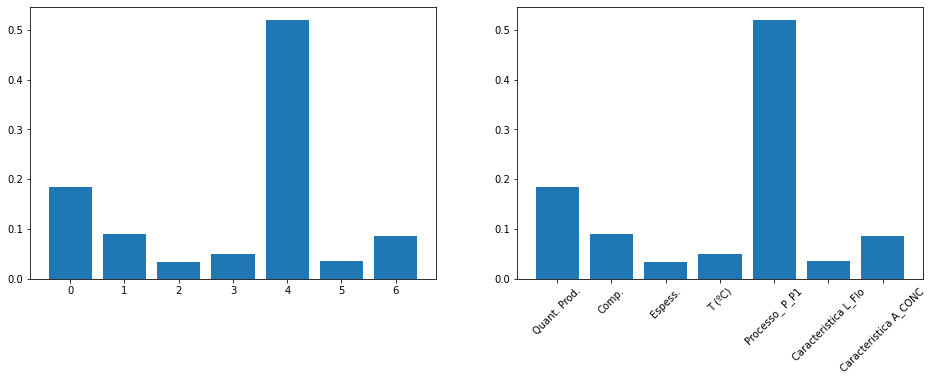

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model_name = "CART"
model_fsel = grid_search.best_estimator_

# fit the model
model_fsel.fit(X_train_fsel, y_train)
# get importance
importance = model_fsel.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_train_fsel.columns, importance):
    ind.append(c) ; res.append(v)
    if v > max_v: max_v = v ; imax = c  
    print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = plt.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
plt.xticks(rotation=45)

print("\nMax score:", max_v*100, "(Feature:", imax, ")")

# save the figure
filename = str('plot-FSelect-'+ model_name + '- ' + w_bins.value + '.png')
plt.savefig(filename)
print("\nFilename: ", filename)

plt.show()

In [ ]:
# make a prediction
y_pred = model_fsel.predict(X_test_fsel)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

Accuracy score: 0.8345864661654135

               precision    recall  f1-score   support

           0       0.98      0.84      0.90       244
           1       0.30      0.77      0.44        22

    accuracy                           0.83       266
   macro avg       0.64      0.81      0.67       266
weighted avg       0.92      0.83      0.86       266



### Display Tree

[Visualization of decision trees](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

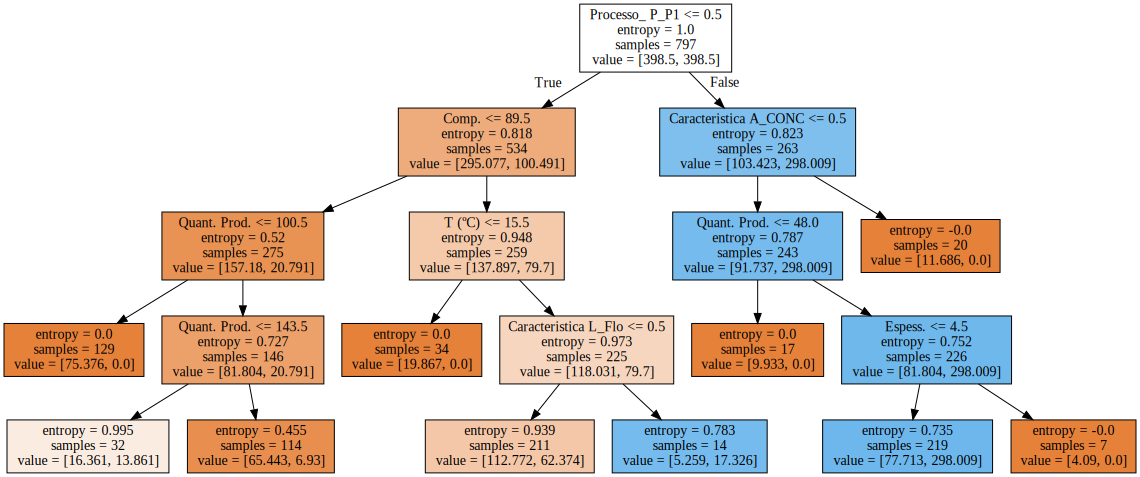

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = X_train_fsel.columns

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels, filled = True, max_depth=5))

display(SVG(graph.pipe(format='svg')))

